# Description

Runs gaussian mixture model on the z_score_std version of the data.

# Environment variables

In [1]:
from IPython.display import display

import conf

N_JOBS = conf.GENERAL["N_JOBS"]
display(N_JOBS)

2

In [2]:
%env MKL_NUM_THREADS=$N_JOBS
%env OPEN_BLAS_NUM_THREADS=$N_JOBS
%env NUMEXPR_NUM_THREADS=$N_JOBS
%env OMP_NUM_THREADS=$N_JOBS

env: MKL_NUM_THREADS=2
env: OPEN_BLAS_NUM_THREADS=2
env: NUMEXPR_NUM_THREADS=2
env: OMP_NUM_THREADS=2


# Modules loading

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from utils import generate_result_set_name

# Settings

In [5]:
np.random.seed(0)

In [6]:
INITIAL_RANDOM_STATE = 60000

## Input data

In [7]:
INPUT_SUBSET = "z_score_std"

In [8]:
INPUT_STEM = "projection-smultixcan-efo_partial-mashr-zscores"

In [9]:
input_filepath = Path(
    conf.RESULTS["DATA_TRANSFORMATIONS_DIR"],
    INPUT_SUBSET,
    f"{INPUT_SUBSET}-{INPUT_STEM}.pkl",
).resolve()
display(input_filepath)

assert input_filepath.exists(), "Input file does not exist"

input_filepath_stem = input_filepath.stem
display(input_filepath_stem)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/data_transformations/z_score_std/z_score_std-projection-smultixcan-efo_partial-mashr-zscores.pkl')

'z_score_std-projection-smultixcan-efo_partial-mashr-zscores'

## Clustering

In [10]:
from sklearn.mixture import GaussianMixture

In [11]:
CLUSTERING_ATTRIBUTES_TO_SAVE = ["n_clusters"]

In [12]:
CLUSTERING_OPTIONS = {}

CLUSTERING_OPTIONS["K_MIN"] = 2
CLUSTERING_OPTIONS["K_MAX"] = 60  # sqrt(3749)
CLUSTERING_OPTIONS["N_REPS_PER_K"] = 5
CLUSTERING_OPTIONS["N_INIT"] = 10
CLUSTERING_OPTIONS["COVARIANCE_TYPE"] = "full"

display(CLUSTERING_OPTIONS)

{'K_MIN': 2,
 'K_MAX': 60,
 'N_REPS_PER_K': 5,
 'N_INIT': 10,
 'COVARIANCE_TYPE': 'full'}

In [13]:
CLUSTERERS = {}

idx = 0
random_state = INITIAL_RANDOM_STATE

for k in range(CLUSTERING_OPTIONS["K_MIN"], CLUSTERING_OPTIONS["K_MAX"] + 1):
    for i in range(CLUSTERING_OPTIONS["N_REPS_PER_K"]):
        clus = GaussianMixture(
            n_components=k,
            n_init=CLUSTERING_OPTIONS["N_INIT"],
            covariance_type=CLUSTERING_OPTIONS["COVARIANCE_TYPE"],
            random_state=random_state,
        )

        method_name = type(clus).__name__
        CLUSTERERS[f"{method_name} #{idx}"] = clus

        random_state = random_state + 1
        idx = idx + 1

In [14]:
display(len(CLUSTERERS))

295

In [15]:
_iter = iter(CLUSTERERS.items())
display(next(_iter))
display(next(_iter))

('GaussianMixture #0',
 GaussianMixture(n_components=2, n_init=10, random_state=60000))

('GaussianMixture #1',
 GaussianMixture(n_components=2, n_init=10, random_state=60001))

In [16]:
clustering_method_name = method_name
display(clustering_method_name)

'GaussianMixture'

## Output directory

In [17]:
# output dir for this notebook
RESULTS_DIR = Path(
    conf.RESULTS["CLUSTERING_RUNS_DIR"],
    f"{INPUT_SUBSET}-{INPUT_STEM}",
).resolve()
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

display(RESULTS_DIR)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores')

# Load input file

In [18]:
data = pd.read_pickle(input_filepath)

In [19]:
data.shape

(3752, 987)

In [20]:
data.head()

,LV1,LV2,LV3,LV4,LV5,LV6,LV7,LV8,LV9,LV10,...,LV978,LV979,LV980,LV981,LV982,LV983,LV984,LV985,LV986,LV987
100001_raw-Food_weight,-0.695006,1.962565,0.057683,0.878731,-0.539977,1.481272,-0.396422,1.090180,0.759223,0.931395,...,1.129784,1.752343,-1.411403,2.823863,0.931116,-1.054519,0.432982,-0.633597,0.554279,-0.642479
100002_raw-Energy,-1.528127,-0.345309,-0.148953,-0.242060,0.373427,0.791092,0.263477,0.987702,0.354391,1.416059,...,0.224604,0.769882,-0.509482,0.091153,2.286789,-1.008256,-0.029764,1.737229,-0.272107,-0.526125
100003_raw-Protein,-0.704572,-1.011299,0.671420,0.143991,0.615212,0.874212,-0.040998,0.915170,0.254369,-0.084237,...,1.003019,1.044314,-2.376108,0.004778,0.053714,-0.892447,-0.183800,1.377991,-0.278794,-0.419733
100004_raw-Fat,-0.989832,-1.875490,0.261555,-1.420719,0.366238,1.167049,0.257387,0.717674,-0.997664,0.969825,...,0.585913,0.638314,0.119139,-0.140204,1.394326,-1.173402,0.555058,1.013982,-0.544506,-0.064061
100005_raw-Carbohydrate,-0.580143,0.243335,0.158966,-0.036558,0.068176,-0.202639,1.101281,0.675227,1.463432,1.010078,...,-0.249108,-0.026814,0.232713,0.323682,1.168642,-0.282935,0.653105,1.909526,0.199997,-1.656894


In [21]:
assert not data.isna().any().any()

# Clustering

## Generate ensemble

In [22]:
from clustering.ensembles.utils import generate_ensemble

In [23]:
ensemble = generate_ensemble(
    data,
    CLUSTERERS,
    attributes=CLUSTERING_ATTRIBUTES_TO_SAVE,
)

  0%|          | 0/295 [00:00<?, ?it/s]

  0%|          | 1/295 [00:12<1:00:31, 12.35s/it]

  1%|          | 2/295 [00:24<1:00:16, 12.34s/it]

  1%|          | 3/295 [00:37<1:00:16, 12.39s/it]

  1%|▏         | 4/295 [00:49<1:00:09, 12.40s/it]

  2%|▏         | 5/295 [01:02<1:00:01, 12.42s/it]

  2%|▏         | 6/295 [01:20<1:08:31, 14.23s/it]

  2%|▏         | 7/295 [01:38<1:14:11, 15.46s/it]

  3%|▎         | 8/295 [01:57<1:18:02, 16.32s/it]

  3%|▎         | 9/295 [02:15<1:20:32, 16.90s/it]

  3%|▎         | 10/295 [02:33<1:21:55, 17.25s/it]

  4%|▎         | 11/295 [03:00<1:35:19, 20.14s/it]

  4%|▍         | 12/295 [03:25<1:41:50, 21.59s/it]

  4%|▍         | 13/295 [03:50<1:46:52, 22.74s/it]

  5%|▍         | 14/295 [04:14<1:48:36, 23.19s/it]

  5%|▌         | 15/295 [04:41<1:52:22, 24.08s/it]

  5%|▌         | 16/295 [05:11<2:01:13, 26.07s/it]

  6%|▌         | 17/295 [05:41<2:06:18, 27.26s/it]

  6%|▌         | 18/295 [06:13<2:11:54, 28.57s/it]

  6%|▋         | 19/295 [06:43<2:12:52, 28.89s/it]

  7%|▋         | 20/295 [07:12<2:13:06, 29.04s/it]

  7%|▋         | 21/295 [07:47<2:20:59, 30.87s/it]

  7%|▋         | 22/295 [08:22<2:26:27, 32.19s/it]

  8%|▊         | 23/295 [08:57<2:29:44, 33.03s/it]

  8%|▊         | 24/295 [09:33<2:31:54, 33.63s/it]

  8%|▊         | 25/295 [10:08<2:34:02, 34.23s/it]

  9%|▉         | 26/295 [10:49<2:42:19, 36.21s/it]

  9%|▉         | 27/295 [11:30<2:47:59, 37.61s/it]

  9%|▉         | 28/295 [12:11<2:51:43, 38.59s/it]

 10%|▉         | 29/295 [12:52<2:54:27, 39.35s/it]

 10%|█         | 30/295 [13:33<2:55:58, 39.84s/it]

 11%|█         | 31/295 [14:20<3:04:40, 41.97s/it]

 11%|█         | 32/295 [15:06<3:10:07, 43.38s/it]

 11%|█         | 33/295 [15:54<3:14:21, 44.51s/it]

 12%|█▏        | 34/295 [16:41<3:17:05, 45.31s/it]

 12%|█▏        | 35/295 [17:28<3:18:34, 45.82s/it]

 12%|█▏        | 36/295 [18:20<3:26:19, 47.80s/it]

 13%|█▎        | 37/295 [19:13<3:31:25, 49.17s/it]

 13%|█▎        | 38/295 [20:05<3:35:18, 50.26s/it]

 13%|█▎        | 39/295 [20:58<3:37:23, 50.95s/it]

 14%|█▎        | 40/295 [21:50<3:38:29, 51.41s/it]

 14%|█▍        | 41/295 [22:49<3:46:23, 53.48s/it]

 14%|█▍        | 42/295 [23:47<3:51:44, 54.96s/it]

 15%|█▍        | 43/295 [24:45<3:55:07, 55.98s/it]

 15%|█▍        | 44/295 [25:44<3:57:02, 56.66s/it]

 15%|█▌        | 45/295 [26:42<3:58:03, 57.13s/it]

 16%|█▌        | 46/295 [27:46<4:05:38, 59.19s/it]

 16%|█▌        | 47/295 [28:50<4:10:32, 60.62s/it]

 16%|█▋        | 48/295 [29:54<4:13:40, 61.62s/it]

 17%|█▋        | 49/295 [30:58<4:15:25, 62.30s/it]

 17%|█▋        | 50/295 [32:02<4:16:28, 62.81s/it]

 17%|█▋        | 51/295 [33:11<4:23:53, 64.89s/it]

 18%|█▊        | 52/295 [34:21<4:28:13, 66.23s/it]

 18%|█▊        | 53/295 [35:31<4:31:37, 67.35s/it]

 18%|█▊        | 54/295 [36:41<4:33:21, 68.06s/it]

 19%|█▊        | 55/295 [37:50<4:34:14, 68.56s/it]

 19%|█▉        | 56/295 [39:06<4:41:14, 70.61s/it]

 19%|█▉        | 57/295 [40:21<4:45:24, 71.95s/it]

 20%|█▉        | 58/295 [41:36<4:47:59, 72.91s/it]

 20%|██        | 59/295 [42:52<4:50:22, 73.82s/it]

 20%|██        | 60/295 [44:07<4:50:50, 74.26s/it]

 21%|██        | 61/295 [45:28<4:57:20, 76.24s/it]

 21%|██        | 62/295 [46:49<5:02:04, 77.79s/it]

 21%|██▏       | 63/295 [48:10<5:04:07, 78.65s/it]

 22%|██▏       | 64/295 [49:32<5:06:23, 79.58s/it]

 22%|██▏       | 65/295 [50:56<5:10:09, 80.91s/it]

 22%|██▏       | 66/295 [52:23<5:16:29, 82.92s/it]

 23%|██▎       | 67/295 [53:51<5:19:58, 84.21s/it]

 23%|██▎       | 68/295 [55:17<5:21:13, 84.91s/it]

 23%|██▎       | 69/295 [56:44<5:22:09, 85.53s/it]

 24%|██▎       | 70/295 [58:12<5:23:25, 86.25s/it]

 24%|██▍       | 71/295 [59:45<5:29:39, 88.30s/it]

 24%|██▍       | 72/295 [1:01:18<5:33:45, 89.80s/it]

 25%|██▍       | 73/295 [1:02:52<5:36:39, 90.99s/it]

 25%|██▌       | 74/295 [1:04:25<5:37:21, 91.59s/it]

 25%|██▌       | 75/295 [1:05:58<5:37:12, 91.97s/it]

 26%|██▌       | 76/295 [1:07:36<5:42:11, 93.75s/it]

 26%|██▌       | 77/295 [1:09:14<5:45:35, 95.12s/it]

 26%|██▋       | 78/295 [1:10:53<5:47:22, 96.05s/it]

 27%|██▋       | 79/295 [1:12:30<5:47:38, 96.57s/it]

 27%|██▋       | 80/295 [1:14:09<5:47:49, 97.07s/it]

 27%|██▋       | 81/295 [1:15:53<5:54:02, 99.27s/it]

 28%|██▊       | 82/295 [1:17:38<5:58:33, 101.00s/it]

 28%|██▊       | 83/295 [1:19:22<6:00:12, 101.95s/it]

 28%|██▊       | 84/295 [1:21:06<6:00:13, 102.44s/it]

 29%|██▉       | 85/295 [1:22:50<6:00:04, 102.88s/it]

 29%|██▉       | 86/295 [1:24:45<6:11:33, 106.67s/it]

 29%|██▉       | 87/295 [1:26:39<6:17:20, 108.85s/it]

 30%|██▉       | 88/295 [1:28:29<6:16:37, 109.17s/it]

 30%|███       | 89/295 [1:30:23<6:19:48, 110.63s/it]

 31%|███       | 90/295 [1:32:13<6:17:18, 110.43s/it]

 31%|███       | 91/295 [1:34:10<6:21:50, 112.31s/it]

 31%|███       | 92/295 [1:36:05<6:22:56, 113.18s/it]

 32%|███▏      | 93/295 [1:38:00<6:23:15, 113.84s/it]

 32%|███▏      | 94/295 [1:39:56<6:23:36, 114.51s/it]

 32%|███▏      | 95/295 [1:41:52<6:22:39, 114.80s/it]

 33%|███▎      | 96/295 [1:43:54<6:27:41, 116.89s/it]

 33%|███▎      | 97/295 [1:45:55<6:30:41, 118.39s/it]

 33%|███▎      | 98/295 [1:47:57<6:31:44, 119.31s/it]

 34%|███▎      | 99/295 [1:49:58<6:31:54, 119.97s/it]

 34%|███▍      | 100/295 [1:52:00<6:31:31, 120.47s/it]

 34%|███▍      | 101/295 [1:54:07<6:36:04, 122.50s/it]

 35%|███▍      | 102/295 [1:56:14<6:38:15, 123.81s/it]

 35%|███▍      | 103/295 [1:58:26<6:43:58, 126.24s/it]

 35%|███▌      | 104/295 [2:00:33<6:42:19, 126.39s/it]

 36%|███▌      | 105/295 [2:02:39<6:40:17, 126.41s/it]

 36%|███▌      | 106/295 [2:04:52<6:44:05, 128.28s/it]

 36%|███▋      | 107/295 [2:07:05<6:46:08, 129.62s/it]

 37%|███▋      | 108/295 [2:09:33<7:01:17, 135.18s/it]

 37%|███▋      | 109/295 [2:11:46<6:57:28, 134.67s/it]

 37%|███▋      | 110/295 [2:13:59<6:53:16, 134.03s/it]

 38%|███▊      | 111/295 [2:16:17<6:55:04, 135.35s/it]

 38%|███▊      | 112/295 [2:18:41<7:00:45, 137.96s/it]

 38%|███▊      | 113/295 [2:21:00<6:58:54, 138.10s/it]

 39%|███▊      | 114/295 [2:23:18<6:56:59, 138.23s/it]

 39%|███▉      | 115/295 [2:25:38<6:55:41, 138.56s/it]

 39%|███▉      | 116/295 [2:28:02<6:58:25, 140.26s/it]

 40%|███▉      | 117/295 [2:30:26<6:59:28, 141.40s/it]

 40%|████      | 118/295 [2:32:50<6:59:39, 142.26s/it]

 40%|████      | 119/295 [2:35:14<6:59:01, 142.85s/it]

 41%|████      | 120/295 [2:37:39<6:57:59, 143.31s/it]

 41%|████      | 121/295 [2:40:15<7:06:48, 147.17s/it]

 41%|████▏     | 122/295 [2:42:45<7:06:48, 148.03s/it]

 42%|████▏     | 123/295 [2:45:16<7:06:45, 148.87s/it]

 42%|████▏     | 124/295 [2:47:52<7:10:25, 151.02s/it]

 42%|████▏     | 125/295 [2:50:23<7:07:41, 150.95s/it]

 43%|████▎     | 126/295 [2:53:05<7:15:09, 154.49s/it]

 43%|████▎     | 127/295 [2:55:50<7:20:47, 157.43s/it]

 43%|████▎     | 128/295 [2:58:26<7:17:14, 157.09s/it]

 44%|████▎     | 129/295 [3:01:04<7:15:08, 157.28s/it]

 44%|████▍     | 130/295 [3:03:40<7:11:47, 157.01s/it]

 44%|████▍     | 131/295 [3:06:22<7:13:31, 158.61s/it]

 45%|████▍     | 132/295 [3:09:12<7:19:41, 161.85s/it]

 45%|████▌     | 133/295 [3:12:01<7:22:32, 163.91s/it]

 45%|████▌     | 134/295 [3:14:44<7:19:14, 163.69s/it]

 46%|████▌     | 135/295 [3:17:33<7:20:39, 165.25s/it]

 46%|████▌     | 136/295 [3:20:20<7:19:32, 165.87s/it]

 46%|████▋     | 137/295 [3:23:07<7:18:01, 166.34s/it]

 47%|████▋     | 138/295 [3:25:55<7:16:08, 166.68s/it]

 47%|████▋     | 139/295 [3:28:43<7:14:22, 167.06s/it]

 47%|████▋     | 140/295 [3:31:37<7:17:20, 169.30s/it]

 48%|████▊     | 141/295 [3:34:30<7:17:20, 170.40s/it]

 48%|████▊     | 142/295 [3:37:25<7:17:37, 171.62s/it]

 48%|████▊     | 143/295 [3:40:18<7:16:06, 172.15s/it]

 49%|████▉     | 144/295 [3:43:12<7:14:45, 172.75s/it]

 49%|████▉     | 145/295 [3:46:05<7:12:03, 172.83s/it]

 49%|████▉     | 146/295 [3:49:11<7:19:07, 176.83s/it]

 50%|████▉     | 147/295 [3:52:11<7:18:09, 177.63s/it]

 50%|█████     | 148/295 [3:55:17<7:21:37, 180.25s/it]

 51%|█████     | 149/295 [3:58:17<7:17:55, 179.97s/it]

 51%|█████     | 150/295 [4:01:15<7:13:58, 179.57s/it]

 51%|█████     | 151/295 [4:04:21<7:15:43, 181.55s/it]

 52%|█████▏    | 152/295 [4:07:28<7:16:17, 183.06s/it]

 52%|█████▏    | 153/295 [4:10:35<7:15:42, 184.10s/it]

 52%|█████▏    | 154/295 [4:13:41<7:14:01, 184.69s/it]

 53%|█████▎    | 155/295 [4:16:47<7:11:58, 185.13s/it]

 53%|█████▎    | 156/295 [4:20:12<7:22:38, 191.07s/it]

 53%|█████▎    | 157/295 [4:23:24<7:20:00, 191.31s/it]

 54%|█████▎    | 158/295 [4:26:34<7:16:11, 191.03s/it]

 54%|█████▍    | 159/295 [4:29:44<7:12:18, 190.72s/it]

 54%|█████▍    | 160/295 [4:33:01<7:13:27, 192.65s/it]

 55%|█████▍    | 161/295 [4:36:16<7:11:47, 193.34s/it]

 55%|█████▍    | 162/295 [4:39:33<7:10:48, 194.35s/it]

 55%|█████▌    | 163/295 [4:42:49<7:09:09, 195.07s/it]

 56%|█████▌    | 164/295 [4:46:06<7:07:00, 195.57s/it]

 56%|█████▌    | 165/295 [4:49:23<7:04:12, 195.79s/it]

 56%|█████▋    | 166/295 [4:53:02<7:16:31, 203.03s/it]

 57%|█████▋    | 167/295 [4:56:25<7:12:32, 202.76s/it]

 57%|█████▋    | 168/295 [4:59:47<7:09:08, 202.75s/it]

 57%|█████▋    | 169/295 [5:03:27<7:16:27, 207.84s/it]

 58%|█████▊    | 170/295 [5:06:49<7:09:09, 206.00s/it]

 58%|█████▊    | 171/295 [5:10:17<7:06:53, 206.56s/it]

 58%|█████▊    | 172/295 [5:13:54<7:10:08, 209.83s/it]

 59%|█████▊    | 173/295 [5:17:22<7:05:29, 209.25s/it]

 59%|█████▉    | 174/295 [5:20:59<7:06:53, 211.68s/it]

 59%|█████▉    | 175/295 [5:24:44<7:10:56, 215.47s/it]

 60%|█████▉    | 176/295 [5:28:17<7:05:50, 214.71s/it]

 60%|██████    | 177/295 [5:32:06<7:11:03, 219.18s/it]

 60%|██████    | 178/295 [5:35:49<7:09:26, 220.23s/it]

 61%|██████    | 179/295 [5:39:23<7:02:07, 218.34s/it]

 61%|██████    | 180/295 [5:42:56<6:55:50, 216.96s/it]

 61%|██████▏   | 181/295 [5:46:36<6:53:25, 217.59s/it]

 62%|██████▏   | 182/295 [5:50:15<6:50:45, 218.10s/it]

 62%|██████▏   | 183/295 [5:53:54<6:47:48, 218.47s/it]

 62%|██████▏   | 184/295 [5:57:33<6:44:20, 218.57s/it]

 63%|██████▎   | 185/295 [6:01:12<6:40:46, 218.60s/it]

 63%|██████▎   | 186/295 [6:04:57<6:40:55, 220.69s/it]

 63%|██████▎   | 187/295 [6:08:42<6:39:18, 221.84s/it]

 64%|██████▎   | 188/295 [6:12:27<6:37:22, 222.83s/it]

 64%|██████▍   | 189/295 [6:16:12<6:34:54, 223.53s/it]

 64%|██████▍   | 190/295 [6:20:06<6:36:25, 226.53s/it]

 65%|██████▍   | 191/295 [6:23:57<6:35:14, 228.02s/it]

 65%|██████▌   | 192/295 [6:27:47<6:32:37, 228.72s/it]

 65%|██████▌   | 193/295 [6:31:48<6:35:04, 232.39s/it]

 66%|██████▌   | 194/295 [6:35:41<6:31:06, 232.34s/it]

 66%|██████▌   | 195/295 [6:39:41<6:31:22, 234.82s/it]

 66%|██████▋   | 196/295 [6:43:38<6:28:35, 235.51s/it]

 67%|██████▋   | 197/295 [6:47:44<6:29:45, 238.63s/it]

 67%|██████▋   | 198/295 [6:51:41<6:25:04, 238.19s/it]

 67%|██████▋   | 199/295 [6:55:38<6:20:34, 237.86s/it]

 68%|██████▊   | 200/295 [6:59:54<6:25:02, 243.18s/it]

 68%|██████▊   | 201/295 [7:03:56<6:20:35, 242.93s/it]

 68%|██████▊   | 202/295 [7:08:18<6:25:12, 248.53s/it]

 69%|██████▉   | 203/295 [7:12:29<6:22:23, 249.39s/it]

 69%|██████▉   | 204/295 [7:16:32<6:15:15, 247.43s/it]

 69%|██████▉   | 205/295 [7:20:44<6:13:04, 248.71s/it]

 70%|██████▉   | 206/295 [7:24:52<6:08:42, 248.56s/it]

 70%|███████   | 207/295 [7:29:01<6:04:38, 248.62s/it]

 71%|███████   | 208/295 [7:33:10<6:00:39, 248.73s/it]

 71%|███████   | 209/295 [7:37:18<5:56:19, 248.59s/it]

 71%|███████   | 210/295 [7:41:37<5:56:39, 251.75s/it]

 72%|███████▏  | 211/295 [7:45:52<5:53:34, 252.55s/it]

 72%|███████▏  | 212/295 [7:50:06<5:49:58, 252.99s/it]

 72%|███████▏  | 213/295 [7:54:41<5:54:47, 259.61s/it]

 73%|███████▎  | 214/295 [7:58:56<5:48:36, 258.22s/it]

 73%|███████▎  | 215/295 [8:03:10<5:42:34, 256.93s/it]

 73%|███████▎  | 216/295 [8:07:29<5:39:25, 257.79s/it]

 74%|███████▎  | 217/295 [8:11:49<5:35:57, 258.43s/it]

 74%|███████▍  | 218/295 [8:16:10<5:32:22, 259.00s/it]

 74%|███████▍  | 219/295 [8:20:40<5:32:14, 262.29s/it]

 75%|███████▍  | 220/295 [8:25:19<5:34:19, 267.45s/it]

 75%|███████▍  | 221/295 [8:29:55<5:33:05, 270.08s/it]

 75%|███████▌  | 222/295 [8:34:21<5:26:54, 268.69s/it]

 76%|███████▌  | 223/295 [8:38:46<5:21:18, 267.76s/it]

 76%|███████▌  | 224/295 [8:43:12<5:16:12, 267.22s/it]

 76%|███████▋  | 225/295 [8:47:38<5:11:10, 266.72s/it]

 77%|███████▋  | 226/295 [8:52:09<5:08:08, 267.94s/it]

 77%|███████▋  | 227/295 [8:56:40<5:04:45, 268.90s/it]

 77%|███████▋  | 228/295 [9:01:21<5:04:21, 272.56s/it]

 78%|███████▊  | 229/295 [9:05:51<4:59:00, 271.82s/it]

 78%|███████▊  | 230/295 [9:10:23<4:54:24, 271.76s/it]

 78%|███████▊  | 231/295 [9:15:02<4:52:19, 274.05s/it]

 79%|███████▊  | 232/295 [9:19:41<4:49:20, 275.56s/it]

 79%|███████▉  | 233/295 [9:24:21<4:46:01, 276.80s/it]

 79%|███████▉  | 234/295 [9:29:00<4:42:01, 277.41s/it]

 80%|███████▉  | 235/295 [9:33:39<4:37:53, 277.90s/it]

 80%|████████  | 236/295 [9:38:21<4:34:40, 279.34s/it]

 80%|████████  | 237/295 [9:43:05<4:31:08, 280.50s/it]

 81%|████████  | 238/295 [9:47:47<4:27:03, 281.12s/it]

 81%|████████  | 239/295 [9:52:30<4:22:52, 281.66s/it]

 81%|████████▏ | 240/295 [9:57:13<4:18:30, 282.01s/it]

 82%|████████▏ | 241/295 [10:02:02<4:15:36, 284.02s/it]

 82%|████████▏ | 242/295 [10:06:50<4:12:08, 285.43s/it]

 82%|████████▏ | 243/295 [10:11:40<4:08:21, 286.57s/it]

 83%|████████▎ | 244/295 [10:16:29<4:04:16, 287.38s/it]

 83%|████████▎ | 245/295 [10:21:19<4:00:06, 288.13s/it]

 83%|████████▎ | 246/295 [10:26:25<3:59:42, 293.52s/it]

 84%|████████▎ | 247/295 [10:31:20<3:55:15, 294.06s/it]

 84%|████████▍ | 248/295 [10:36:15<3:50:31, 294.29s/it]

 84%|████████▍ | 249/295 [10:41:10<3:45:44, 294.44s/it]

 85%|████████▍ | 250/295 [10:46:05<3:40:58, 294.63s/it]

 85%|████████▌ | 251/295 [10:51:06<3:37:33, 296.66s/it]

 85%|████████▌ | 252/295 [10:56:07<3:33:31, 297.94s/it]

 86%|████████▌ | 253/295 [11:01:08<3:29:13, 298.90s/it]

 86%|████████▌ | 254/295 [11:06:09<3:24:41, 299.54s/it]

 86%|████████▋ | 255/295 [11:11:10<3:19:59, 299.98s/it]

 87%|████████▋ | 256/295 [11:16:18<3:16:26, 302.21s/it]

 87%|████████▋ | 257/295 [11:21:37<3:14:37, 307.30s/it]

 87%|████████▋ | 258/295 [11:26:45<3:09:42, 307.62s/it]

 88%|████████▊ | 259/295 [11:31:53<3:04:34, 307.62s/it]

 88%|████████▊ | 260/295 [11:37:13<3:01:38, 311.40s/it]

 88%|████████▊ | 261/295 [11:42:25<2:56:34, 311.60s/it]

 89%|████████▉ | 262/295 [11:47:38<2:51:31, 311.87s/it]

 89%|████████▉ | 263/295 [11:52:50<2:46:20, 311.88s/it]

 89%|████████▉ | 264/295 [11:58:02<2:41:07, 311.87s/it]

 90%|████████▉ | 265/295 [12:03:14<2:36:02, 312.08s/it]

 90%|█████████ | 266/295 [12:08:44<2:33:26, 317.47s/it]

 91%|█████████ | 267/295 [12:14:02<2:28:15, 317.68s/it]

 91%|█████████ | 268/295 [12:19:20<2:23:00, 317.78s/it]

 91%|█████████ | 269/295 [12:24:39<2:17:49, 318.05s/it]

 92%|█████████▏| 270/295 [12:30:10<2:14:05, 321.81s/it]

 92%|█████████▏| 271/295 [12:35:33<2:08:57, 322.40s/it]

 92%|█████████▏| 272/295 [12:40:57<2:03:44, 322.83s/it]

 93%|█████████▎| 273/295 [12:46:46<2:01:12, 330.55s/it]

 93%|█████████▎| 274/295 [12:52:11<1:55:06, 328.86s/it]

 93%|█████████▎| 275/295 [12:57:34<1:49:05, 327.27s/it]

 94%|█████████▎| 276/295 [13:03:04<1:43:49, 327.88s/it]

 94%|█████████▍| 277/295 [13:08:33<1:38:28, 328.26s/it]

 94%|█████████▍| 278/295 [13:14:01<1:33:01, 328.33s/it]

 95%|█████████▍| 279/295 [13:19:31<1:27:39, 328.70s/it]

 95%|█████████▍| 280/295 [13:25:01<1:22:16, 329.08s/it]

 95%|█████████▌| 281/295 [13:30:36<1:17:13, 330.95s/it]

 96%|█████████▌| 282/295 [13:36:12<1:12:02, 332.52s/it]

 96%|█████████▌| 283/295 [13:41:48<1:06:43, 333.60s/it]

 96%|█████████▋| 284/295 [13:47:25<1:01:18, 334.40s/it]

 97%|█████████▋| 285/295 [13:53:00<55:47, 334.71s/it]  

 97%|█████████▋| 286/295 [13:58:41<50:29, 336.66s/it]

 97%|█████████▋| 287/295 [14:04:23<45:04, 338.06s/it]

 98%|█████████▊| 288/295 [14:10:04<39:32, 338.92s/it]

 98%|█████████▊| 289/295 [14:15:45<33:58, 339.67s/it]

 98%|█████████▊| 290/295 [14:21:26<28:20, 340.05s/it]

 99%|█████████▊| 291/295 [14:27:26<23:04, 346.06s/it]

 99%|█████████▉| 292/295 [14:33:13<17:18, 346.27s/it]

 99%|█████████▉| 293/295 [14:39:00<11:33, 346.70s/it]

100%|█████████▉| 294/295 [14:44:48<05:46, 346.84s/it]

100%|██████████| 295/295 [14:50:35<00:00, 346.88s/it]

100%|██████████| 295/295 [14:50:35<00:00, 181.14s/it]

In [24]:
# the number should be close to 295 (the number of partitions generated by k-means/spectral clustering)
ensemble.shape

(295, 3)

In [25]:
ensemble.head()

,clusterer_params,partition,n_clusters
clusterer_id,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2


In [26]:
ensemble["n_clusters"].value_counts().head()

60    5
16    5
28    5
27    5
26    5
Name: n_clusters, dtype: int64

In [27]:
ensemble_stats = ensemble["n_clusters"].describe()
display(ensemble_stats)

count    295.000000
mean      31.000000
std       17.058323
min        2.000000
25%       16.000000
50%       31.000000
75%       46.000000
max       60.000000
Name: n_clusters, dtype: float64

## Testing

In [28]:
assert ensemble_stats["min"] > 1

In [29]:
assert not ensemble["n_clusters"].isna().any()

In [30]:
assert ensemble.shape[0] == len(CLUSTERERS)

In [31]:
# all partitions have the right size
assert np.all(
    [part["partition"].shape[0] == data.shape[0] for idx, part in ensemble.iterrows()]
)

In [32]:
# no partition has negative clusters (noisy points)
assert not np.any([(part["partition"] < 0).any() for idx, part in ensemble.iterrows()])

## Add clustering quality measures

In [33]:
from sklearn.metrics import calinski_harabasz_score

In [34]:
ensemble = ensemble.assign(
    ch_score=ensemble["partition"].apply(lambda x: calinski_harabasz_score(data, x))
)

In [35]:
ensemble.shape

(295, 4)

In [36]:
ensemble.head()

,clusterer_params,partition,n_clusters,ch_score
clusterer_id,,,,
GaussianMixture #0,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,48.534389
GaussianMixture #1,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,48.534389
GaussianMixture #2,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,48.534389
GaussianMixture #3,"{'covariance_type': 'full', 'init_params': 'km...","[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",2,48.534389
GaussianMixture #4,"{'covariance_type': 'full', 'init_params': 'km...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",2,48.534389


## Save

In [37]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [38]:
ensemble.to_pickle(output_filename)

# Cluster quality

In [39]:
with pd.option_context("display.max_rows", None, "display.max_columns", None):
    _df = ensemble.groupby(["n_clusters"]).mean()
    display(_df)

,ch_score
n_clusters,
2,48.534389
3,34.138565
4,24.739609
5,19.744033
6,16.707348
7,14.544384
8,13.387689
9,13.370167
10,12.504775


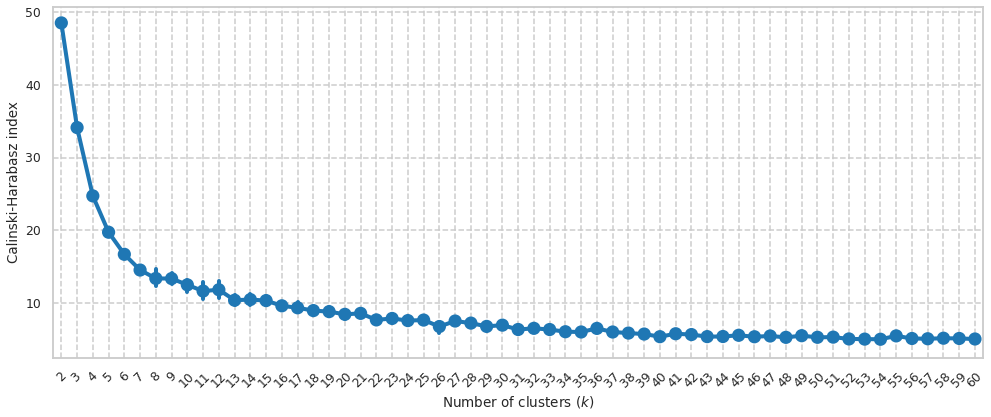

In [40]:
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=ensemble, x="n_clusters", y="ch_score")
    ax.set_ylabel("Calinski-Harabasz index")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    plt.grid(True)
    plt.tight_layout()

# Stability

## Group ensemble by n_clusters

In [41]:
parts = ensemble.groupby("n_clusters").apply(
    lambda x: np.concatenate(x["partition"].apply(lambda x: x.reshape(1, -1)), axis=0)
)

In [42]:
parts.head()

n_clusters
2    [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...
3    [[1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0,...
4    [[0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0,...
5    [[4.0, 0.0, 0.0, 1.0, 0.0, 1.0, 3.0, 0.0, 4.0,...
6    [[4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0, 4.0,...
dtype: object

In [43]:
assert np.all(
    [
        parts.loc[k].shape == (CLUSTERING_OPTIONS["N_REPS_PER_K"], data.shape[0])
        for k in parts.index
    ]
)

## Compute stability

In [44]:
from sklearn.metrics import adjusted_rand_score as ari
from scipy.spatial.distance import pdist

In [45]:
parts_ari = pd.Series(
    {k: pdist(parts.loc[k], metric=ari) for k in parts.index}, name="k"
)

In [46]:
parts_ari_stability = parts_ari.apply(lambda x: x.mean())
display(parts_ari_stability.sort_values(ascending=False).head(15))

2     1.000000
3     0.997378
4     0.316965
27    0.275466
31    0.270068
24    0.265113
32    0.256409
26    0.250803
33    0.219408
35    0.218325
37    0.216102
29    0.210635
17    0.197152
5     0.191748
30    0.187425
Name: k, dtype: float64

In [47]:
parts_ari_df = pd.DataFrame.from_records(parts_ari.tolist()).set_index(
    parts_ari.index.copy()
)

In [48]:
parts_ari_df.shape

(59, 10)

In [49]:
assert (
    int(
        (CLUSTERING_OPTIONS["N_REPS_PER_K"] * (CLUSTERING_OPTIONS["N_REPS_PER_K"] - 1))
        / 2
    )
    == parts_ari_df.shape[1]
)

In [50]:
parts_ari_df.head()

,0,1,2,3,4,5,6,7,8,9
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,1.000000,0.995234,1.000000,0.996423,0.995234,1.000000,0.996423,0.995234,0.998808,0.996423
4,0.336428,0.325902,0.254532,0.300594,0.401712,0.310232,0.368609,0.301345,0.292521,0.277774
5,0.214630,0.180646,0.171573,0.248183,0.175254,0.168893,0.200062,0.177806,0.197471,0.182964
6,0.112280,0.167328,0.105241,0.128800,0.138682,0.118298,0.154892,0.135128,0.148209,0.135943


## Save

In [51]:
output_filename = Path(
    RESULTS_DIR,
    generate_result_set_name(
        CLUSTERING_OPTIONS,
        prefix=f"{clustering_method_name}-stability-",
        suffix=".pkl",
    ),
).resolve()
display(output_filename)

PosixPath('/home/miltondp/projects/labs/greenelab/phenoplier/base/results/clustering/runs/z_score_std-projection-smultixcan-efo_partial-mashr-zscores/GaussianMixture-stability-COVARIANCE_TYPE_full-K_MAX_60-K_MIN_2-N_INIT_10-N_REPS_PER_K_5.pkl')

In [52]:
parts_ari_df.to_pickle(output_filename)

## Stability plot

In [53]:
parts_ari_df_plot = (
    parts_ari_df.stack()
    .reset_index()
    .rename(columns={"level_0": "k", "level_1": "idx", 0: "ari"})
)

In [54]:
parts_ari_df_plot.dtypes

k        int64
idx      int64
ari    float64
dtype: object

In [55]:
parts_ari_df_plot.head()

,k,idx,ari
0,2,0,1.0
1,2,1,1.0
2,2,2,1.0
3,2,3,1.0
4,2,4,1.0


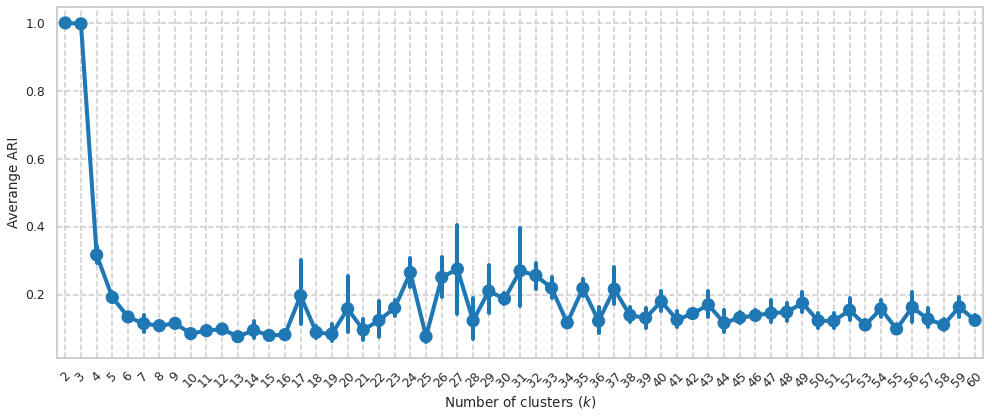

In [56]:
# with sns.axes_style('whitegrid', {'grid.linestyle': '--'}):
with sns.plotting_context("talk", font_scale=0.75), sns.axes_style(
    "whitegrid", {"grid.linestyle": "--"}
):
    fig = plt.figure(figsize=(14, 6))
    ax = sns.pointplot(data=parts_ari_df_plot, x="k", y="ari")
    ax.set_ylabel("Averange ARI")
    ax.set_xlabel("Number of clusters ($k$)")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    #     ax.set_ylim(0.0, 1.0)
    #     ax.set_xlim(CLUSTERING_OPTIONS['K_MIN'], CLUSTERING_OPTIONS['K_MAX'])
    plt.grid(True)
    plt.tight_layout()